# Network Dynamics: Node Centrality - Lab

## Introduction

In this lab, you'll get a chance to practice implementing and interpreting the centrality metrics discussed in the previous lesson by investigating the social network from Game of Thrones!

## Objectives
You will be able to: 
- Compare and calculate degree, closeness, betweenness, and eigenvector centrality measures
- Interpret characteristics of certain nodes based on their centrality metrics  

## Character Interaction Graph Data

A. J. Beveridge and J. Shan created a network from George R. Martin's "A song of ice and fire" by extracting relationships between characters of the story. [The dataset is available at Github](https://github.com/mathbeveridge/asoiaf). Relationships between characters were formed every time a character's name appears within 15 words of another character. This was designed as an approximate metric for character's interactions with each other. The results of this simple analysis are quite profound and produce interesting visuals such as this graph:

<img src="images/got.png" width=800>

With that, it's your turn to start investigating the most central characters!

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')
%matplotlib inline

##  Load the dataset 

Start by loading the dataset as a pandas DataFrame. From this, you'll then create a network representation of the dataset using NetworkX. 

The dataset is stored in the file `'asoiaf-all-edges.csv'`.

In [2]:
# Load edges into dataframes
df = pd.read_csv('asoiaf-all-edges.csv')

# Print the first five rows
df.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


## Create a Graph

- Instantiate an empty graph 
- Iterate through the data and create appropriate edges to the empty graph you instantiated above. Be sure to add the weight to each edge 

In [3]:
# Create an empty graph instance
G = nx.Graph()

In [4]:
df.Type.unique()

array(['Undirected'], dtype=object)

In [5]:
# We can see that all of the edges are undirected in this edge list

In [6]:
for row in df.index:
    print(row)
    break

0


In [7]:
# Read edge lists into dataframes
for row in df.index:
    G.add_edge(df.loc[row, 'Source'], df.loc[row, 'Target'], weight=df.loc[row, 'weight'])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


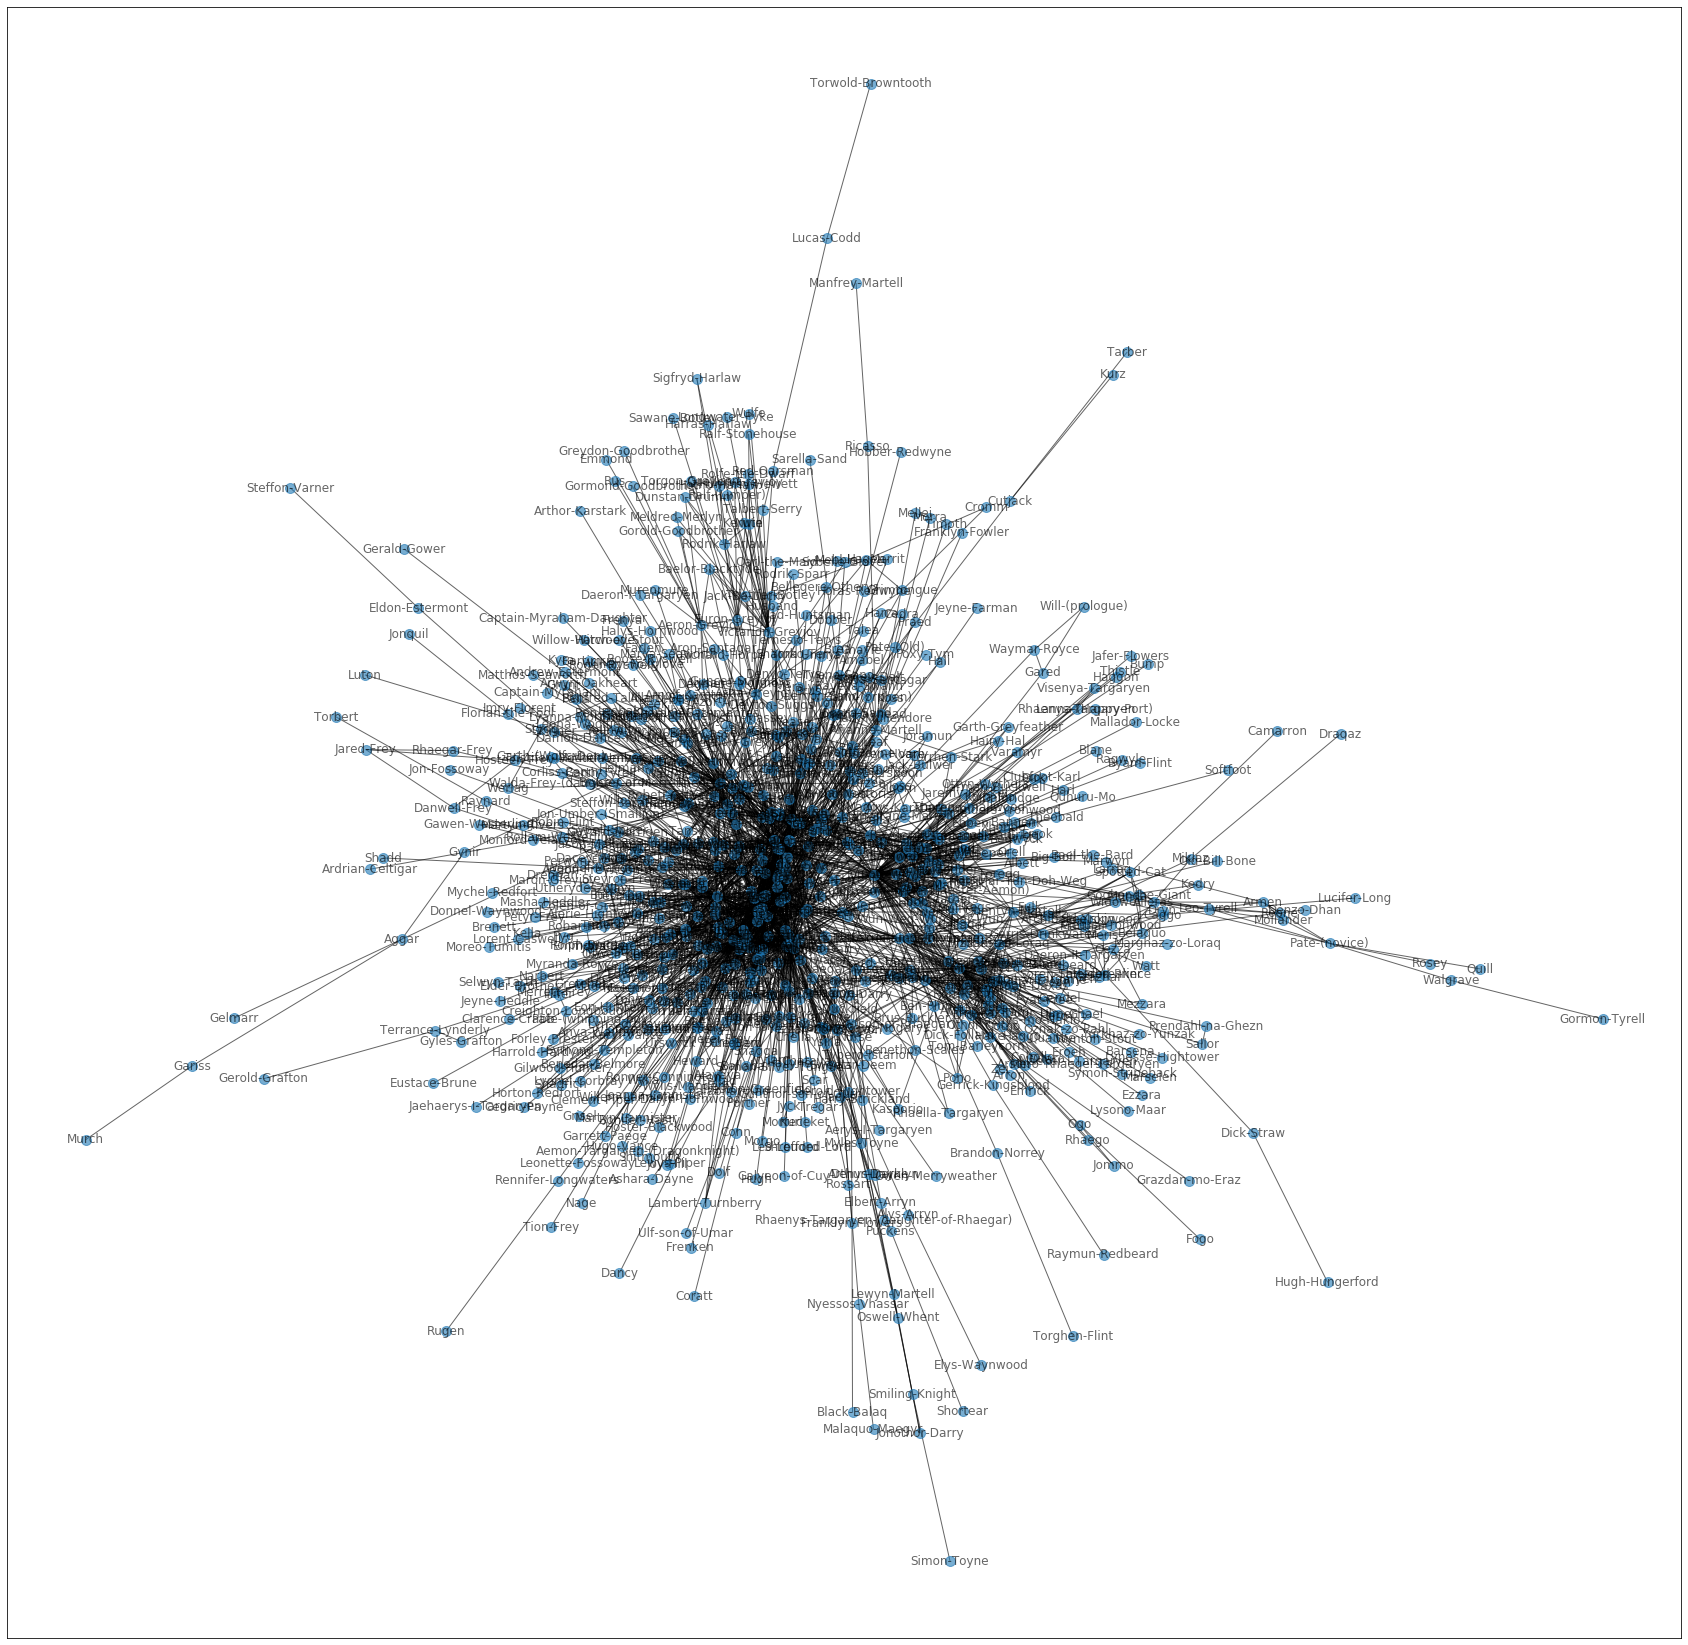

In [8]:
plt.figure(figsize=(30,30))
nx.draw_networkx(G, node_size=100, alpha=0.6)

## Calculate Degree

To start the investigation of the most central characters in the books, calculate the degree centrality for each character. Then create a bar graph of the top 10 characters according to degree centrality.

In [9]:
degrees = nx.degree_centrality(G)
degrees = pd.DataFrame.from_dict(degrees, orient='index')
degrees.head()

,0
Addam-Marbrand,0.015094
Brynden-Tully,0.023899
Cersei-Lannister,0.122013
Gyles-Rosby,0.022642
Jaime-Lannister,0.127044


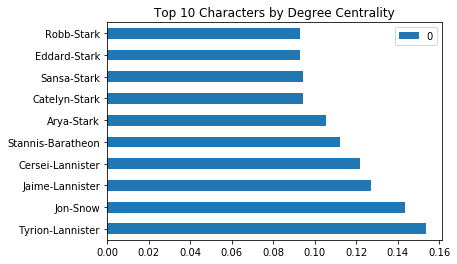

In [10]:
#plt.style.use('seaborn-darkgrid')
degrees.sort_values(by=0, ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Characters by Degree Centrality');

## Closeness Centrality

Repeat the above exercise for the top 10 characters according to closeness centrality.

Text(0.5, 1.0, 'Top 10 Characters by Closeness Centrality')

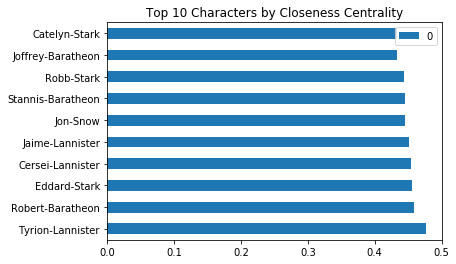

In [11]:
closeness = pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index')
closeness.sort_values(by=0, ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Characters by Closeness Centrality')

## Betweeness Centrality

Repeat the process one more time for betweeness centrality.

Text(0.5, 1.0, 'Top 10 Characters by Betweenness Centrality')

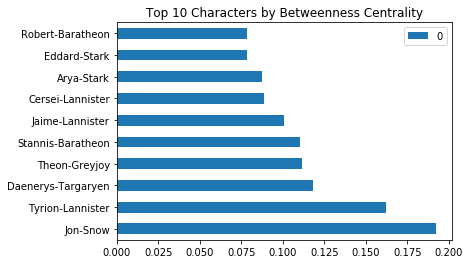

In [12]:
betweenness = pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index')
betweenness.sort_values(by=0, ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Characters by Betweenness Centrality')

## Putting it All Together

Great! Now put all of these metrics together along with eigenvector centrality. Combine all four metrics into a single dataframe for each character.

In [13]:
eigen_centrality = pd.DataFrame.from_dict(nx.eigenvector_centrality(G), orient='index')
centrality = pd.concat([degrees, closeness, betweenness, eigen_centrality], axis=1)
centrality.columns = ['degree', 'closeness', 'betweenness', 'eigenvector']
centrality.head()

,degree,closeness,betweenness,eigenvector
Addam-Marbrand,0.015094,0.345803,0.000470,0.052658
Brynden-Tully,0.023899,0.371495,0.002227,0.060019
Cersei-Lannister,0.122013,0.454545,0.088704,0.235771
Gyles-Rosby,0.022642,0.339453,0.000415,0.059528
Jaime-Lannister,0.127044,0.451961,0.100838,0.226339


## Identifying Key Players

While centrality can tell us a lot, you've also begun to see how certain individuals may not be the most central characters, but can be pivotal in the flow of information from one community to another. In the previous lesson, such nodes were labeled as 'bridges' acting as the intermediaries between two clusters. Try and identify such characters from this dataset.

In [14]:
len(centrality)

796

In [15]:
centrality.describe()

,degree,closeness,betweenness,eigenvector
count,796.000000,796.000000,796.000000,7.960000e+02
mean,0.008922,0.299830,0.003043,1.676850e-02
std,0.015955,0.045028,0.014208,3.124621e-02
min,0.001258,0.150511,0.000000,2.148365e-07
25%,0.002516,0.276594,0.000000,2.439252e-03
50%,0.003774,0.307901,0.000004,6.733163e-03
75%,0.008805,0.322777,0.000639,1.446315e-02
max,0.153459,0.476333,0.192120,2.515584e-01


In [16]:
bridges = centrality[(centrality.betweenness > centrality.betweenness.mean()) 
                     & (centrality.degree < centrality.degree.mean())]
bridges

,degree,closeness,betweenness,eigenvector
Dareon,0.007547,0.326355,0.003076,0.014403
Arthur-Dayne,0.006289,0.277390,0.005297,0.005382
Aggar,0.005031,0.269036,0.007997,0.001665
Leo-Tyrell,0.006289,0.262203,0.005207,0.001682
Pate-(novice),0.008805,0.215097,0.010042,0.000175
Red-Oarsman,0.003774,0.261255,0.005025,0.001042
Spotted-Cat,0.007547,0.278264,0.003356,0.002756
Shagga,0.008805,0.325420,0.005058,0.016243
Bryce-Caron,0.006289,0.315476,0.005175,0.012067
Varamyr,0.007547,0.310304,0.007538,0.007163


In [17]:
centrality['bridge_proxy'] = centrality.betweenness / centrality.degree
bridges = centrality.sort_values(by='bridge_proxy', ascending=False).head(10)
bridges

,degree,closeness,betweenness,eigenvector,bridge_proxy
Aggar,0.005031,0.269036,0.007997,0.001665,1.589358
Alleras,0.010063,0.272915,0.014199,0.002928,1.411040
Theon-Greyjoy,0.083019,0.423323,0.111283,0.102481,1.340458
Jon-Snow,0.143396,0.445378,0.192120,0.144211,1.339782
Cutjack,0.003774,0.255135,0.005028,0.001404,1.332494
Red-Oarsman,0.003774,0.261255,0.005025,0.001042,1.331654
Daenerys-Targaryen,0.091824,0.383317,0.118418,0.063043,1.289621
Victarion-Greyjoy,0.030189,0.333753,0.036451,0.009395,1.207431
Pate-(novice),0.008805,0.215097,0.010042,0.000175,1.140428
Tyrion-Lannister,0.153459,0.476333,0.162191,0.251558,1.056901


## Drawing the Graph

To visualize all of these relationships, draw a graph of the network.

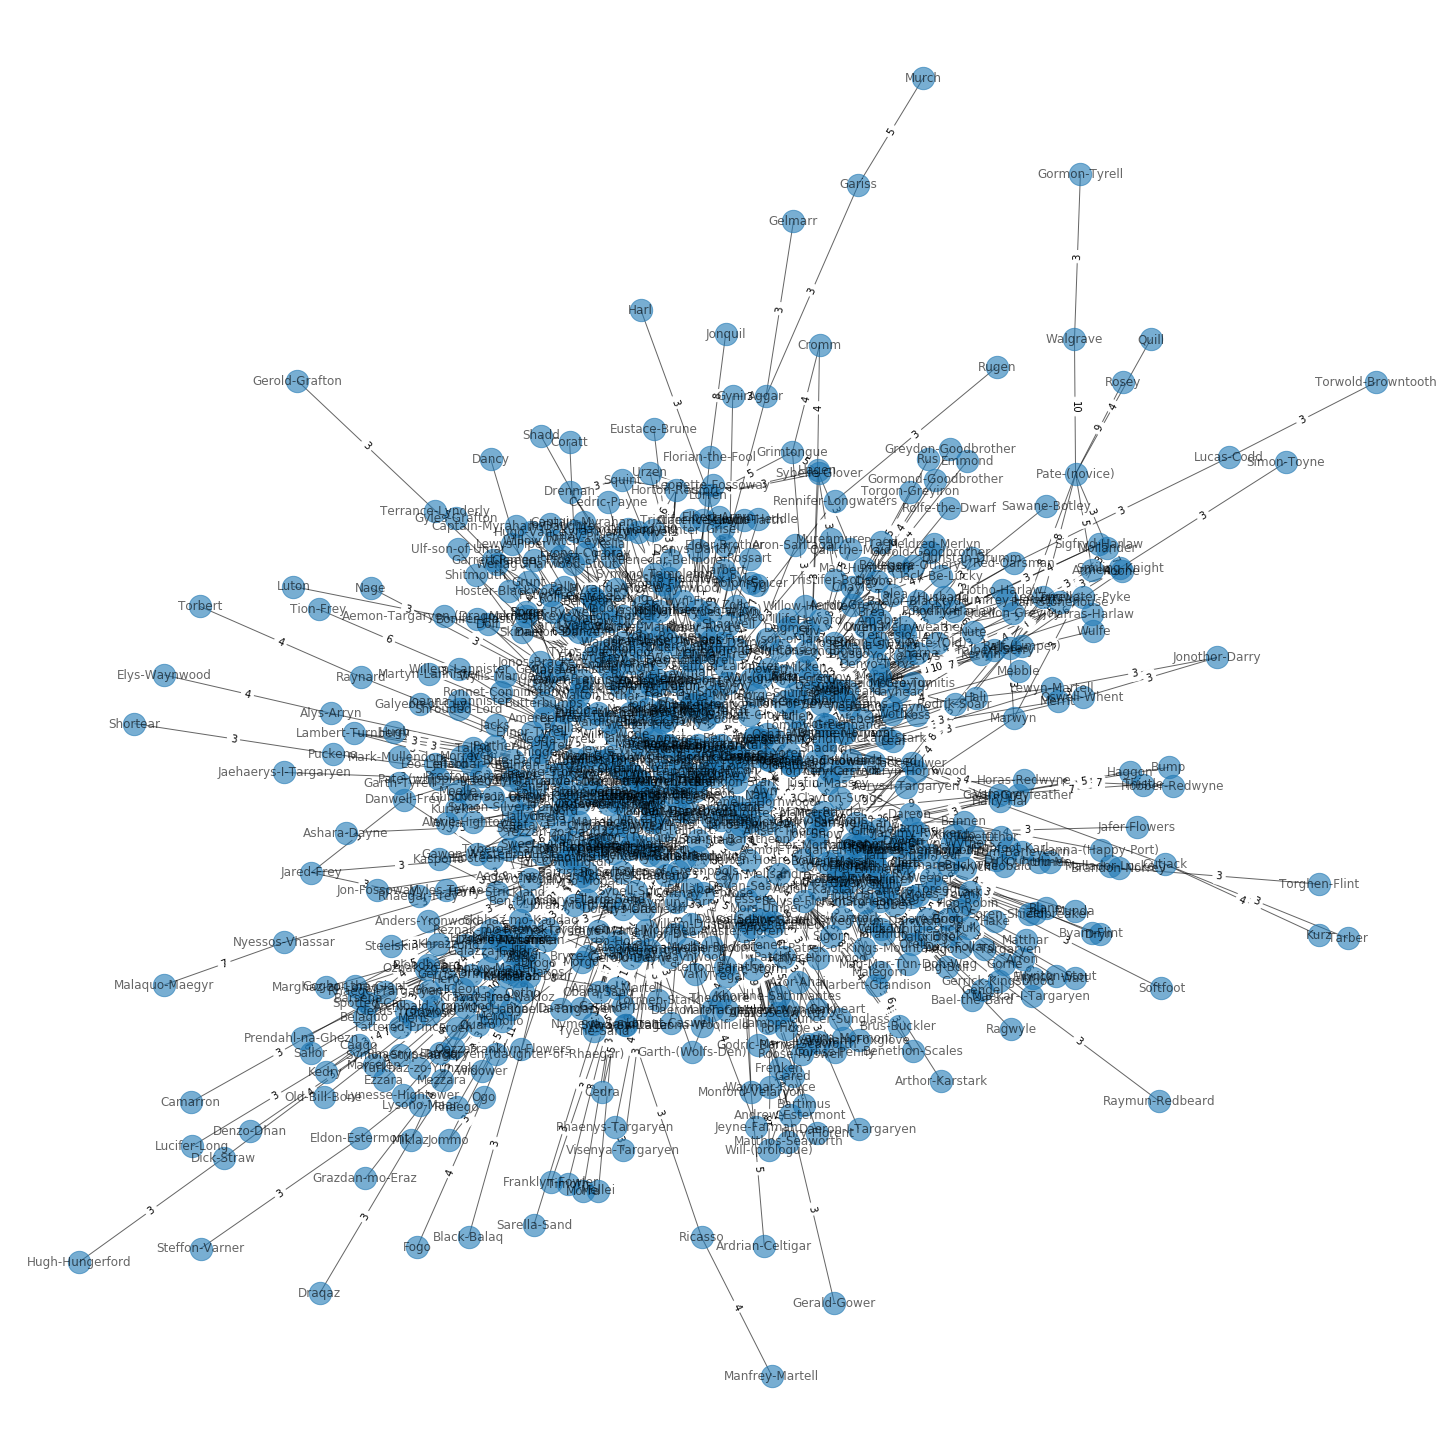

In [18]:
plt.figure(figsize=(20,20))
edge_labels = nx.get_edge_attributes(G, 'weight')
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos, alpha=0.6, node_size=500)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels);

## Subsetting the Graph

As you can see, the above graph is undoubtedly noisy, making it difficult to discern any useful patterns. As such, reset the graph and only add edges whose weight is 75 or greater. From there, redraw the graph. To further help with the display, try using `nx.spring_layout(G)` for the position. To jazz it up, try and recolor those nodes which you identified as bridge or bottleneck nodes to communication.

In [19]:
[node for node in G.nodes if node in bridges.index]

['Tyrion-Lannister',
 'Daenerys-Targaryen',
 'Alleras',
 'Jon-Snow',
 'Theon-Greyjoy',
 'Victarion-Greyjoy',
 'Aggar',
 'Pate-(novice)',
 'Red-Oarsman',
 'Cutjack']

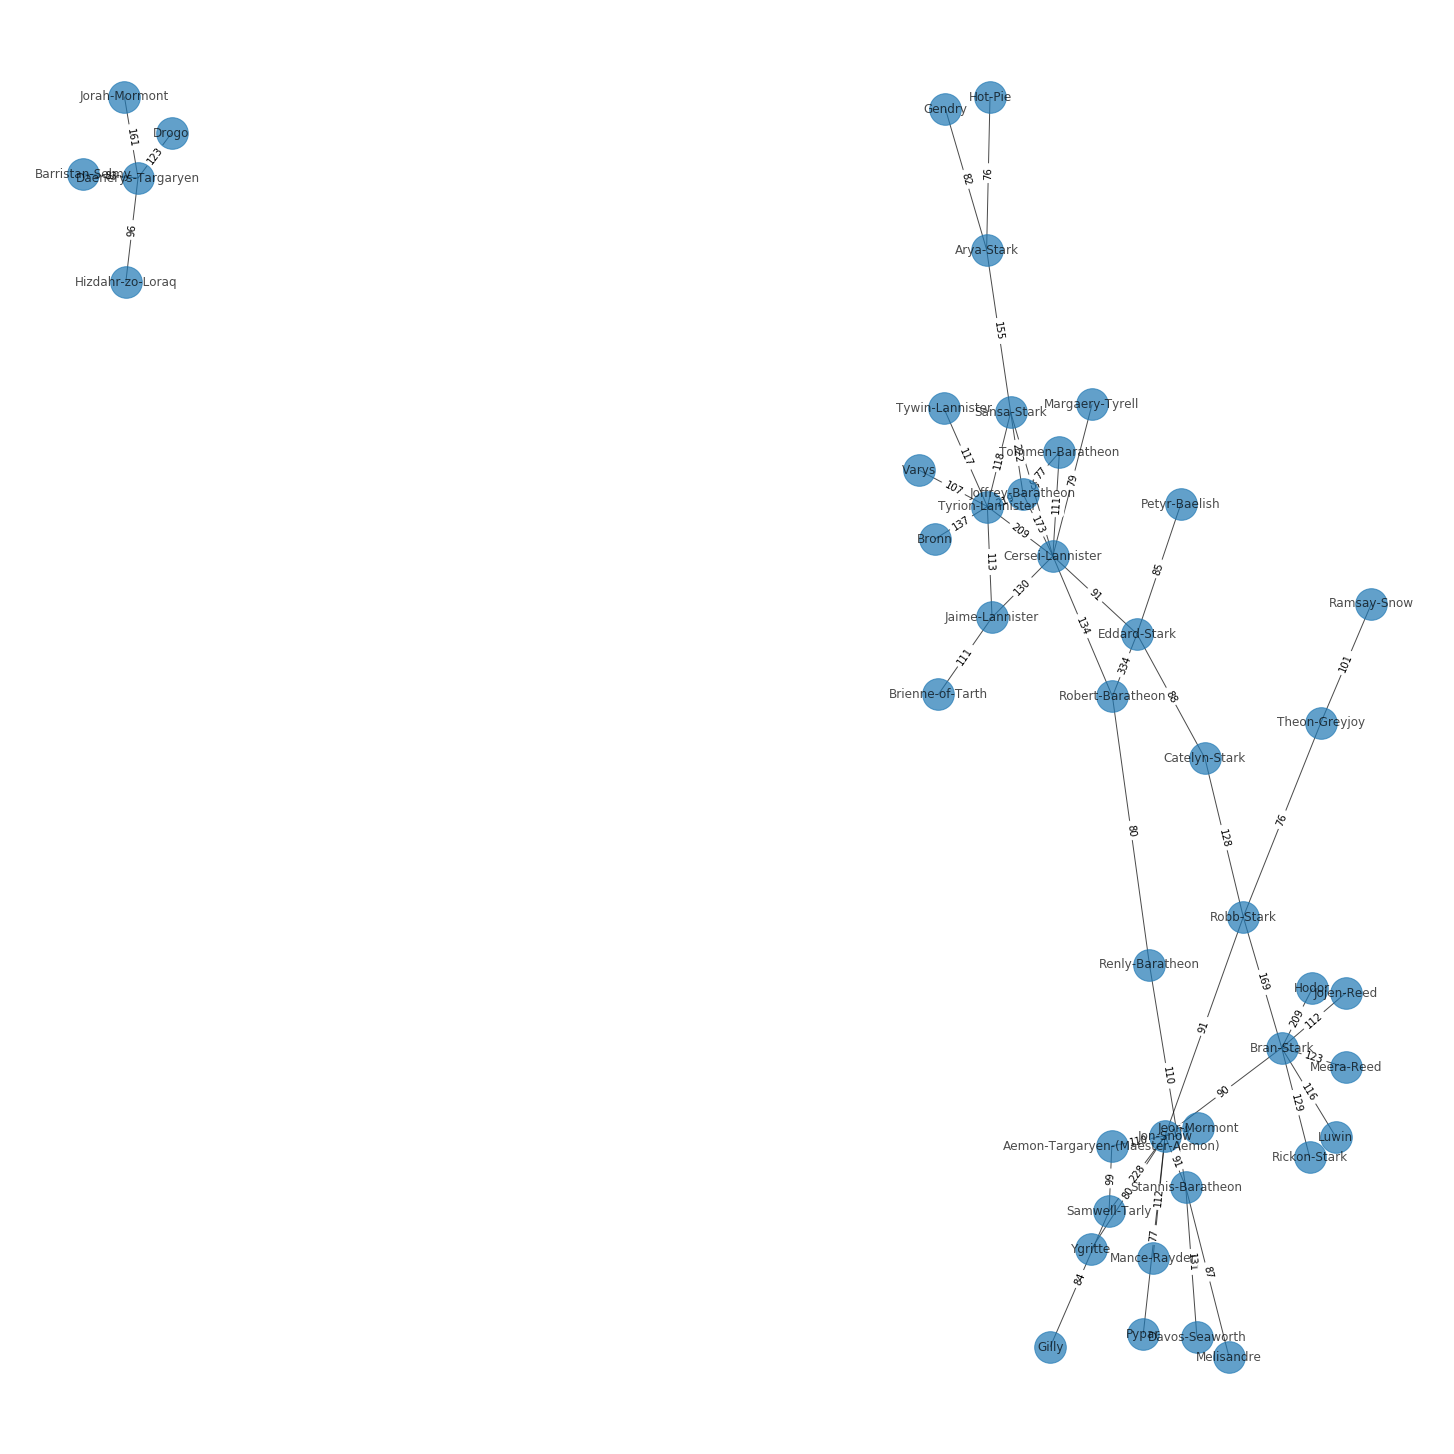

In [26]:
threshold = 75
G = nx.Graph()
colors = []

for row in df.index:
    source = df.loc[row, 'Source']
    target = df.loc[row, 'Target']
    weight = df.loc[row, 'weight']
    if weight > threshold:
        G.add_edge(source, target, weight=weight)
        
edge_labels = nx.get_edge_attributes(G, 'weight')

for node in G.nodes:
    if node in bridges.index:
        colors.append('#ffd43d')
    else:
        colors.append('#1cf0c7')
        
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos, alpha=0.7, node_colors=colors, node_size=1000)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels);

## Summary 

In this lab, we looked at different centrality measures of the graph data for the ASIOF dataset. We also compared these measures to see how they correlate with each other. We also saw in practice, the difference between taking the weighted centrality measures and how it may effect the results. 